In [3]:
''' Experiment 6
Data scraping techniques (web scraping, API integration) :Apply data scraping techniques by extracting data
from a web page (url: https://en.wikipedia.org/wiki/World_population) . Retrieve tables from the Wikipedia
page on World Population using web scraping methods and display the data in Pandas DataFrames for
further analysis '''

import pandas as pd
import requests
from io import StringIO

url = 'https://en.wikipedia.org/wiki/World_population'
headers = {'User-Agent': 'Mozilla/5.0'}
html = requests.get(url, headers=headers).text
tables = pd.read_html(StringIO(html))

print(f'Found: {len(tables)}')

for i, t in enumerate(tables[:3]):
    print(f'----- Table {i} -----')
    print(t.head())


Found: 26
----- Table 0 -----
      Population     1     2     3     4     5     6     7     8     9    10
0           Year  1804  1927  1960  1974  1987  1999  2011  2022  2037  2057
1  Years elapsed     –   123    33    14    13    12    12    11    15    20
----- Table 1 -----
                               Region  2022 (percent)  2030 (percent)  \
0                  Sub-Saharan Africa  1,152 (14.51%)  1,401 (16.46%)   
1    Northern Africa and Western Asia     549 (6.91%)     617 (7.25%)   
2      Central Asia and Southern Asia  2,075 (26.13%)  2,248 (26.41%)   
3  Eastern Asia and Southeastern Asia  2,342 (29.49%)  2,372 (27.87%)   
4         Europe and Northern America  1,120 (14.10%)  1,129 (13.26%)   

   2050 (percent)  
0  2,094 (21.62%)  
1     771 (7.96%)  
2  2,575 (26.58%)  
3  2,317 (23.92%)  
4  1,125 (11.61%)  
----- Table 2 -----
                     Region Density (inhabitants/km2) Population (millions)  \
0                      Asia                     104.1        

D:\manth\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\manth\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\manth\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\manth\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

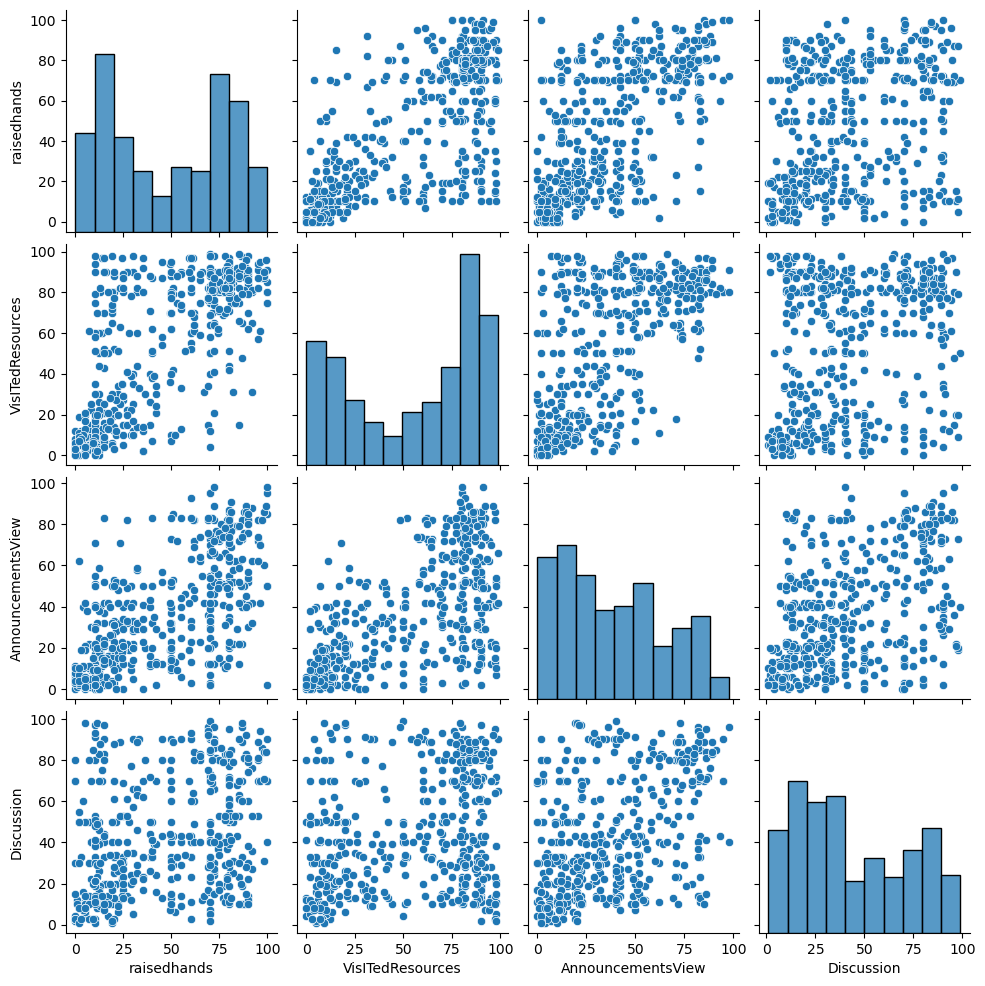

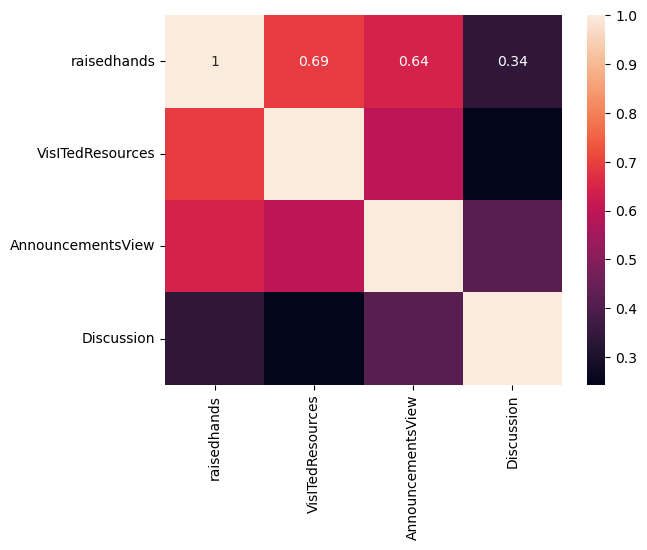

In [6]:
''' Experiment 8
Exploratory Data Analysis (EDA): Analyze the performance of students in various subjects using a dataset
of student grades. Perform Exploratory Data Analysis (EDA) to identify patterns, correlations, and trends in
the data. Visualize the distribution of grades, the correlation between subjects, and the impact of attendance
on grades using Matplotlib and Seaborn. (Use dataset from Kaggle or UCI Machine Learning Repository)
Student Performance - UCI Machine Learning Repository
Students&#39; Academic Performance Dataset (kaggle.com) '''

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('EduDS.csv')

# pairplot shows relationships between subjects
sns.pairplot(df)
plt.show()

# heatmap shows correlations
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()


        Unnamed: 0            id         price      bedrooms     bathrooms  \
count  21613.00000  2.161300e+04  2.161300e+04  21600.000000  21603.000000   
mean   10806.00000  4.580302e+09  5.400881e+05      3.372870      2.115736   
std     6239.28002  2.876566e+09  3.671272e+05      0.926657      0.768996   
min        0.00000  1.000102e+06  7.500000e+04      1.000000      0.500000   
25%     5403.00000  2.123049e+09  3.219500e+05      3.000000      1.750000   
50%    10806.00000  3.904930e+09  4.500000e+05      3.000000      2.250000   
75%    16209.00000  7.308900e+09  6.450000e+05      4.000000      2.500000   
max    21612.00000  9.900000e+09  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2079.899736  1.510697e+04      1.494309      0.007542      0.234303   
std      918.440897  4.142051e+04      0.539989      0.08651

D:\manth\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


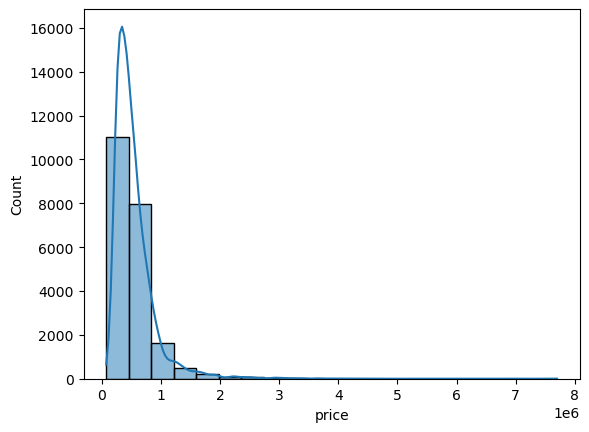

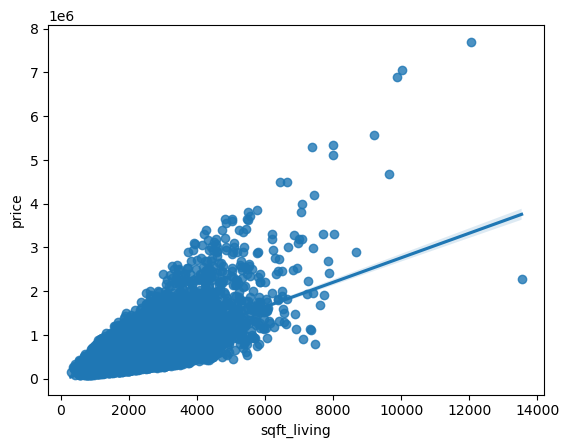

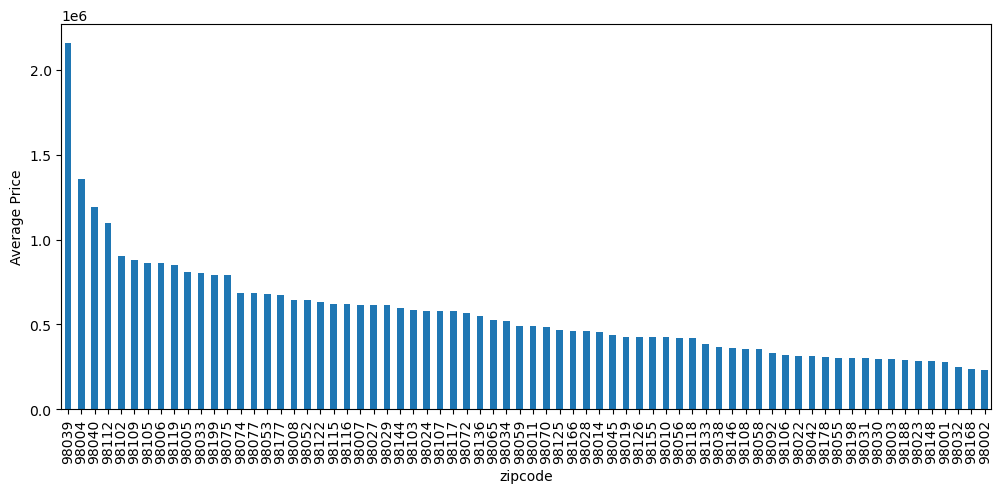

In [3]:
''' Experiment 9
Dataset Link: House Sales in King County, USA - Kaggle
1. Load the dataset and display summary statistics using describe(). What insights can you derive about
house prices?
2. Check for missing values and propose methods to handle any missing data in the dataset.
3. Visualize the distribution of house prices using a histogram. Are there any significant outliers?
4. Use a scatter plot to examine the relationship between sqft_living (living area) and price. Add a
regression line to visualize the trend.
5. Group the data by zipcode and calculate the average house price for each zip code. Visualize this
using a bar chart. '''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('kingsCountry.csv')
# 1.
print(df.describe())

# 2.
print(df.isnull().sum)
df = df.fillna(df.select_dtypes(include='number').mean())
df = df.fillna('UNDEFINED')

# 3.
sns.histplot(df['price'], bins=20, kde=True)
plt.show()

# 4.
sns.regplot(x='sqft_living', y='price', data=df)
plt.show()

# 5.
avg_price = df.groupby('zipcode')['price'].mean().sort_values(ascending=False)
avg_price.plot(kind='bar', figsize=(12,5))
plt.ylabel('Average Price')
plt.show()


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
     survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S

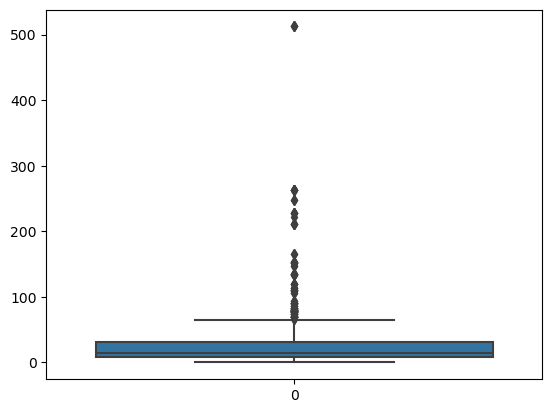

In [12]:
''' Experiment 18
Apply following queries in iris dataset
1. Understand data using head, tail, shape, column name etc
2. Describe function used to find the total count, mean, standard deviation, minimum value, maximum
value, 25,50,75 percentage of the dataset value
3. how many nulls present in each attribute of dataset
4. Handle the missing values of Age and Cabin attribute as : Fill missing values of age attribute by
mean of age. Fill missing values of Cabin attribute by value “Unknown”.
5. Detect outliers present in attributes(e.g. for Fare attribute ). Use matplotlib to detect it. Replace
outliers with some values within range. '''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('titanic')

# 1. Load and understand data
print(df.head())       # first 5 rows
print(df.tail())       # last 5 rows
print(df.shape)        # rows, columns
print(df.columns)      # column names

# 2. Describe statistics
print(df.describe())   # gives count, mean, std, min, 25%, 50%, 75%, max

# 3. Check null values
print(df.isnull().sum())  # number of nulls per column

# 4. Handle missing values (example with Age, Cabin)
df['age'].fillna(df['age'].mean(), inplace=True)

# 5. Detect and handle outliers (example: Fare)
sns.boxplot(df['fare'])
plt.show()

# Replace outliers with upper/lower limits
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df['fare'] = df['fare'].clip(lower, upper)


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672


D:\manth\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


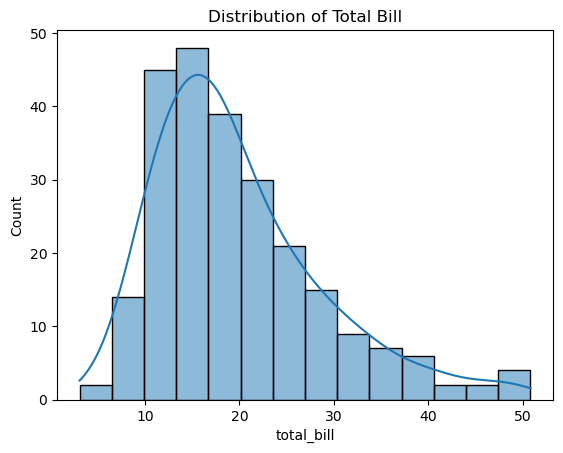

C:\Users\manth\AppData\Local\Temp\ipykernel_24468\1234866019.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['tip'], shade=True)
D:\manth\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


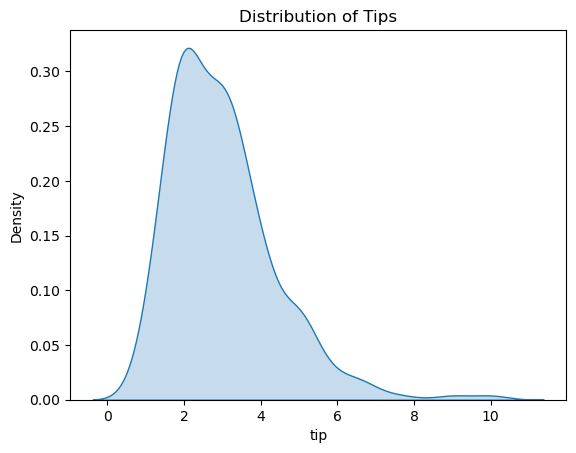

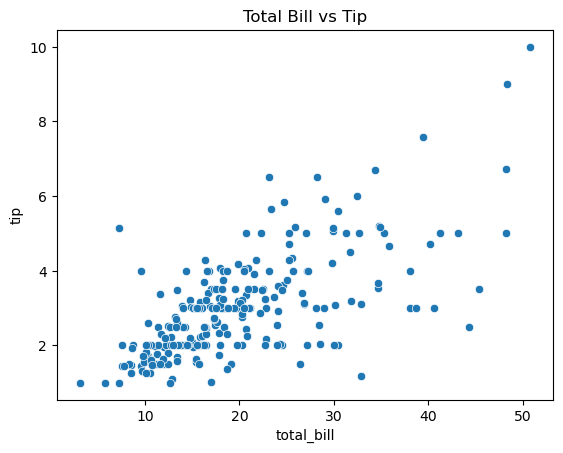

D:\manth\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


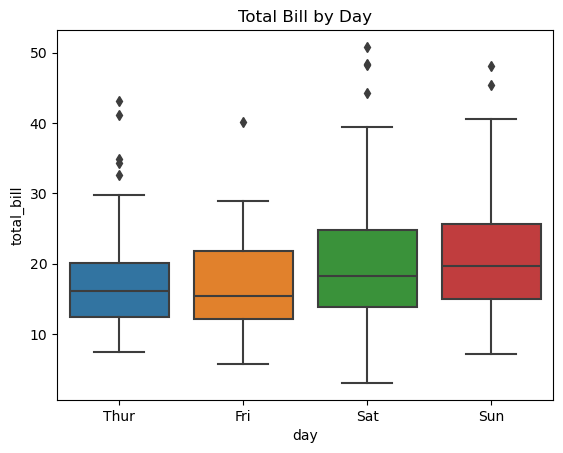

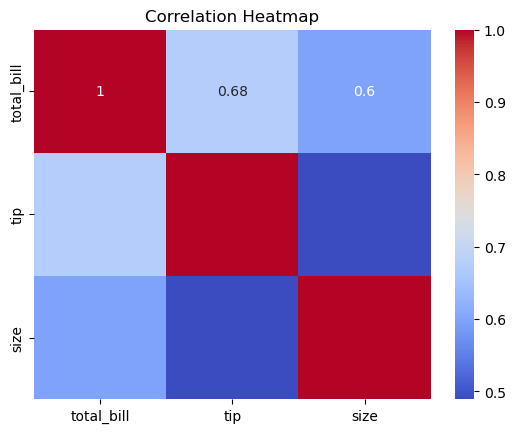

In [14]:
''' Experiment 16
Use the tips dataset:
1. Explore the data by visualizing:
2. Distributions using sns.histplot() or sns.kdeplot()
3. Visualize the total bill and tip amounts using a scatterplot.
4. Use a boxplot to analyze how total_bill varies across different days.
5. Plot a heatmap to show the correlation matrix for numeric variables in the dataset. '''

import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset('tips')

# 1. Explore data
print(df.head())
print(df.info())
print(df.describe())

# 2. Distribution plots
sns.histplot(df['total_bill'], kde=True)
plt.title('Distribution of Total Bill')
plt.show()

sns.kdeplot(df['tip'], shade=True)
plt.title('Distribution of Tips')
plt.show()

# 3. Scatterplot – Total bill vs Tip
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Total Bill vs Tip')
plt.show()

# 4. Boxplot – Total bill across different days
sns.boxplot(x='day', y='total_bill', data=df)
plt.title('Total Bill by Day')
plt.show()

# 5. Heatmap – Correlation matrix
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [27]:
''' Experiment 1
Implement following operations on python data structures
1.
Write a Python program to reverse a list.
2.
How do you remove duplicates from a list in Python?
3.
Explain the difference between a list and a tuple in Python.
4.
Write a Python program to count the occurrences of an element in a tuple.
5.
Write a Python program to merge two dictionaries.
6.
Write a program to sort a dictionary by its keys or values.
7.
Write a Python program to find the intersection two sets?
8.
Write a Python program to find the union of two sets. '''

# 1.
list1 = [1,2,3,4,5,6]
list1.reverse()
print("Reversed List", list1 )

# 2. 
list2 = [1,3,4,2,1,1,2,3,]
u = []
for i in list2:
    if i not in u :
        u.append(i)

print("Unique List: " , u)

# 4.
t = (1,2,3,2,1,2,3,4)
print("Tuple: " , t)
print("Occurrence of 2: ", t.count(2))

# 5. 
d1 = {'a': 1, 'b': 2, 'c': 3, 'd': 4}
d2 = {'e': 5, 'f': 6}
print("Dictionary 1: ", d1)
print("Dictionary 2: ", d2)
d1.update(d2)
print("Combined Dictionary:", d1)

# 6.
d1 = {'d': 4, 'e': 3, 'a': 1, 'f': 2}
print("Sorted Dict:", dict(sorted(d1.items())))

# 7.
s1 = {2,1,3,4,5}
s2 = {3,23,14,4,3}
s3 = s1 & s2
print("Intersection: ", s3)

# 8.
s1 = {2,1,3,4,5}
s2 = {3,23,14,4,3}
s3 = s1 | s2
print("Union: ", s3)

Reversed List [6, 5, 4, 3, 2, 1]
Unique List:  [1, 3, 4, 2]
Tuple:  (1, 2, 3, 2, 1, 2, 3, 4)
Occurrence of 2:  3
Dictionary 1:  {'a': 1, 'b': 2, 'c': 3, 'd': 4}
Dictionary 2:  {'e': 5, 'f': 6}
Combined Dictionary: {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}
Sorted Dict: {'a': 1, 'd': 4, 'e': 3, 'f': 2}
Intersection:  {3, 4}
Union:  {1, 2, 3, 4, 5, 14, 23}


In [38]:
''' Experiment 2
Introduction to pandas : take Sports dataset that shows the results from NCAA basketball games from 1985 to 2016. Execute following questions using pandas
1.
Display sample records using head() and tail() function.
2.
Display number of records in dataset
3.
Display the number of missing values in each column.
4.
Display maximum value present in each column
5.
Display unique values present in each column
6.
Display number of unique values present in each column
7.
Display number of times unique values appeared in each column. '''

import pandas as pd

# 1.
df = pd.read_csv('cbb1.csv')
print(df.head())
print(df.tail())

# 2.
print("Number of Records: ", df.shape)

# 3. 
print(df.isnull().sum())

# 4.
print("Maximum Values: ", df.max(numeric_only=True))

# 5.
# for col in df.columns:
#     print("Column: ", col)
#     print("Unique: ", df[col].unique())

# 6.
print("Number of Unique Values in Each Column:", df.nunique())

7.
for col in df.columns:
    print("Column: ", col)
    print("Unique: ", df[col].nunique())

             TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0  North Carolina  ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1       Wisconsin  B10  40  36  129.1   93.6   0.9758   54.8   47.7  12.4   
2        Michigan  B10  40  33  114.4   90.4   0.9375   53.9   47.7  14.0   
3      Texas Tech  B12  38  31  115.2   85.2   0.9696   53.5   43.0  17.7   
4         Gonzaga  WCC  39  37  117.8   86.3   0.9728   56.6   41.1  16.2   

   ...  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  POSTSEASON  SEED  YEAR  
0  ...  30.4  53.9  44.6  32.7  36.2   71.7   8.6         2ND   1.0  2016  
1  ...  22.4  54.8  44.7  36.5  37.5   59.3  11.3         2ND   1.0  2015  
2  ...  30.0  54.7  46.8  35.2  33.2   65.9   6.9         2ND   3.0  2018  
3  ...  36.6  52.8  41.9  36.5  29.7   67.5   7.0         2ND   3.0  2019  
4  ...  26.9  56.3  40.0  38.2  29.0   71.5   7.7         2ND   1.0  2017  

[5 rows x 24 columns]
                        TEAM  CONF   G  W  ADJOE  ADJDE  B

In [54]:
''' Experiment 3
Execute Basic operations and functionalities of the NumPy library in Python.
1.
Create a 1D NumPy array with values ranging from 10 to 49.
2.
Reshape the array into a 3x5 matrix.
3.
Extract the elements that are divisible by 3 from the original array.
4.
Create two 3x3 NumPy arrays with random integers.
5.
Perform element-wise addition, subtraction, multiplication, and division. '''

import numpy as np

# 1.
arr = np.arange(10,50)
print(arr)

# 2. 
arr2 = arr[:15].reshape(3,5)
print(arr2)

# 3.
arr3 = arr[arr%3 == 0]
print(arr3)

# 4.
ar1 = np.random.randint(0,90,(3,3))
ar2 = np.random.randint(10,19,(3,3))
print(ar1)
print(ar2)

# 5. 
ad = ar1 + ar2
print("Addition: ", ad)

ad = ar1 - ar2
print("Substraction: ", ad)

ad = ar1 * ar2
print("Multiplication: ", ad)

ad = ar1 / ar2
print("Division: ", ad)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[[10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[12 15 18 21 24 27 30 33 36 39 42 45 48]
[[31  2 20]
 [32  6 69]
 [84 49 11]]
[[17 13 17]
 [18 13 10]
 [12 18 14]]
Addition:  [[48 15 37]
 [50 19 79]
 [96 67 25]]
Substraction:  [[ 14 -11   3]
 [ 14  -7  59]
 [ 72  31  -3]]
Multiplication:  [[ 527   26  340]
 [ 576   78  690]
 [1008  882  154]]
Division:  [[1.82352941 0.15384615 1.17647059]
 [1.77777778 0.46153846 6.9       ]
 [7.         2.72222222 0.78571429]]


In [68]:
''' Experiment 4
Array Manipulations and Boolean Indexing
1.
Create a 1D NumPy array with 15 evenly spaced numbers between 1 and 100.
2.
Create a 4x4 array with random integers between 1 and 50 and replace all even numbers with -1.
3.
Create a 5x5 matrix of random integers between 1 and 100 and retrieve all elements in second row and last column
4.
Create a NumPy array with integers from 1 to 50 and extract all the odd numbers.
5.
Create a 3x3 array with random floating-point values and Calculate its mean '''

import numpy as np

# 1.
arr = np.linspace(1,101,15)
print(arr)

# 2.
arr1 = np.random.randint(1,51,(4,4))
arr1[arr1%2 == 0] = -1
print(arr1)

# 3.
arr3 = np.random.randint(1,101,(5,5))
print("Second Row:", arr3[1])
print("Last Column:", arr3[:,-1])

# 4.
arr4 = np.arange(1,51)
ans = []

for i in arr4:
    if i%2 != 0:
        ans.append(i)

print(ans)

# 5.
arr5 = np.random.rand(3,3)
avg = arr5.mean()
print(arr5)
print(avg)

[  1.           8.14285714  15.28571429  22.42857143  29.57142857
  36.71428571  43.85714286  51.          58.14285714  65.28571429
  72.42857143  79.57142857  86.71428571  93.85714286 101.        ]
[[-1 -1 23 -1]
 [-1 27 -1 13]
 [-1 -1 47 -1]
 [-1 -1 -1  1]]
Second Row: [29 34 39 94 93]
Last Column: [84 93 16 38 81]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
[[0.42745673 0.16177943 0.67400396]
 [0.7810214  0.67685088 0.75559374]
 [0.72190273 0.24134277 0.98433406]]
0.6026984114655535


In [82]:
''' Experiment 5
Reshaping, Transposing, and Element-wise Operations
1.
Create a 1D NumPy array with values from 1 to 16 and reshape it into a 4x4 matrix.
2.
Create a 3x4 matrix with random integers between 10 and 99, transpose it, and print its shape.
3.
Create a 1D array with 10 elements (random integers) and compute the square of each element.
4.
Create a 2D NumPy array filled with zeros of shape (4, 5).
5.
Create a NumPy array of integers from 1 to 20 and extract all elements that are greater than 5. '''

import numpy as np

# 1. 
arr1 = np.arange(1,17)
print("1D Array:", arr1)
reshape = arr1.reshape(4,4)
print("Reshaped: ", reshape)

# 2.
arr2 = np.random.randint(10,100,(3,4))
print(arr2)
arrT = arr2.T
print("Transposed: ", arrT)
print("Shape: ", arrT.shape)

# 3.
arr3 = np.arange(1,10)
print("Actual Array:", arr3)

sq = np.square(arr3)
print("Squared: ", sq)

# 4.
arr4 = np.zeros((4,5))
print(arr4)

# 5.
arr5 = np.arange(1,20)
print("OG Array: ", arr5)
res = []

for i in arr5:
    if i>5:
        res.append(i)

print(">5: ", res)

1D Array: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Reshaped:  [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
[[59 13 60 86]
 [41 36 72 85]
 [58 81 17 57]]
Transposed:  [[59 41 58]
 [13 36 81]
 [60 72 17]
 [86 85 57]]
Shape:  (4, 3)
Actual Array: [1 2 3 4 5 6 7 8 9]
Squared:  [ 1  4  9 16 25 36 49 64 81]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
OG Array:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
>5:  [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [89]:
'''
Create suitable dataset in CSV , read dataset using pandas. Also execute head (), tail() ,info(),describe() functions, 
execute attribute like dtypes, shape etc. and give your insights.
'''

import pandas as pd

data = {
    'Name': ['Amit', 'Riya', 'Karan', 'Sneha', 'Vivek'],
    'Age': [20, 21, 19, 22, 20],
    'Marks': [85, 90, 75, 95, 80],
    'City': ['Pune', 'Mumbai', 'Delhi', 'Nagpur', 'Pune']
}

df = pd.DataFrame(data)
print(df)

print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print("Data Types: \n", df.dtypes)
print(df.shape)

    Name  Age  Marks    City
0   Amit   20     85    Pune
1   Riya   21     90  Mumbai
2  Karan   19     75   Delhi
3  Sneha   22     95  Nagpur
4  Vivek   20     80    Pune
    Name  Age  Marks    City
0   Amit   20     85    Pune
1   Riya   21     90  Mumbai
2  Karan   19     75   Delhi
3  Sneha   22     95  Nagpur
4  Vivek   20     80    Pune
    Name  Age  Marks    City
0   Amit   20     85    Pune
1   Riya   21     90  Mumbai
2  Karan   19     75   Delhi
3  Sneha   22     95  Nagpur
4  Vivek   20     80    Pune
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   Marks   5 non-null      int64 
 3   City    5 non-null      object
dtypes: int64(2), object(2)
memory usage: 292.0+ bytes
None
             Age      Marks
count   5.000000   5.000000
mean   20.400000  85.000000
std     1.140175  

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
     survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S

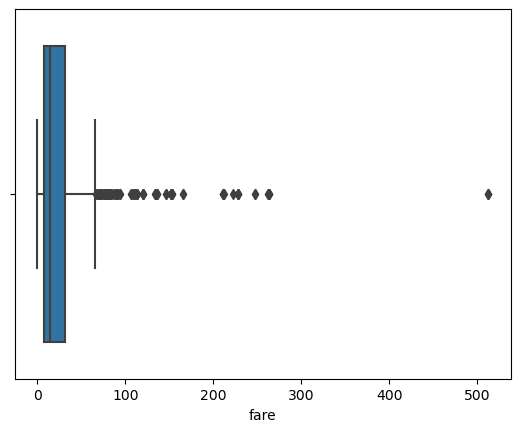

DONE


In [110]:
''' Experiment 7
Data Cleaning and Preprocessing with the Titanic Dataset: Handling Missing Values and Outliers.
1.
Understand data using head, tail, shape, column name etc
2.
Describe function used to find the total count, mean, standard deviation, minimum value, maximum value, 25,50,75 percentage of the dataset value
3.
how many nulls present in each attribute of dataset
4.
Handle the missing values of Age and Cabin attribute as : Fill missing values of age attribute by mean of age. Fill missing values of
Cabin attribute by value “Unkown”.
5.
Detect outliers present in attributes(e.g. for Fare attribute ). Use matplotlib to detect it. Replace outliers with some values within range. '''

import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')

# 1.
print(df.head())
print(df.tail())
print(df.shape)
print(df.columns)

# 2.
print(df.describe())

# 3.
print("Null Values:",df.isnull().sum())

# 4.
df['age'].fillna(df['age'].mean())
df['deck'] = df['deck'].cat.add_categories('Unknown')
df['deck'].fillna('Unknown')

# 5.
sns.boxplot(x=df['fare'])
plt.show()

Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['fare'] = df['fare'].clip(lower,upper)
print("DONE")


In [ ]:
''' Experiment 10
Dataset Link: Titanic Dataset on Kaggle
1.
Load the dataset and display the first 10 rows using head(). What are the column names and their data types?
2.
Check for missing values in the dataset and identify the columns with the most missing data.
3.
Analyze the survival rate across different age groups using a bar plot.
4.
Examine the survival rate based on the passenger class (Pclass) and visualize it using a bar chart.
5.
Create a heatmap of the correlation matrix for the numerical features. What are the most correlated features? '''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load dataset
df = sns.load_dataset('titanic')
print(df.head(10))
print("Columns:", df.columns)
print("Data Types:\n", df.dtypes)

# 2. Missing values
print("Missing Values:\n", df.isnull().sum())
print("Most Missing:", df.isnull().sum().idxmax())

# 3. Survival by Age Group
df['age_group'] = pd.cut(df['age'], bins=[0,18,35,60,80], labels=['Child','Young','Adult','Senior'])
sns.barplot(x='age_group', y='survived', data=df)
plt.show()

# 4. Survival by Passenger Class
sns.barplot(x='pclass', y='survived', data=df)
plt.show()

# 5. Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()
